# Scenario Generation

Notebook for generating the scenarios for the team assignment.

In [45]:
using CSV
using DataFrames
using Plots
using Statistics

In [46]:
using Distributions
using Random
using Clustering

In [47]:
gr()

Plots.GRBackend()

In [48]:
# Reading the data
df = CSV.read("data/scen_zone1.out", DataFrame)
df = dropmissing(df, disallowmissing=true)

┌ Warning: thread = 1 warning: only found 1 / 101 columns around data row: 44. Filling remaining columns with `missing`
└ @ CSV C:\Users\user\.julia\packages\CSV\aoJqo\src\file.jl:586
┌ Warning: thread = 1 warning: only found 1 / 101 columns around data row: 44. Filling remaining columns with `missing`
└ @ CSV C:\Users\user\.julia\packages\CSV\aoJqo\src\file.jl:586


Row,Column1,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,⋯
,String3,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,⋯
1,1,0.38446,0.5077,0.464001,0.476854,0.48001,0.354537,0.60302,0.636561,0.470492,0.511493,0.606389,0.416816,0.49045,0.626075,0.624892,0.453346,0.473867,0.463209,0.480927,0.706977,0.502125,0.611043,0.551823,0.364299,0.626913,0.541001,0.487075,0.627999,0.452509,0.459935,0.626004,0.618834,0.761323,0.546258,0.560171,0.381015,0.684417,0.526615,0.475871,0.561332,0.46741,0.58371,0.674228,0.549045,0.522676,0.530223,0.415527,0.650325,0.571348,0.415866,0.535395,0.577562,0.544713,0.543573,0.57059,0.441378,0.255143,0.59169,0.459174,0.646069,0.426053,0.312949,0.711288,0.540132,0.526172,0.592612,0.597653,0.480313,0.495607,0.45575,0.570104,0.614129,0.627194,0.506959,0.466467,0.457418,0.620382,0.372349,0.491648,0.676267,0.395858,0.39381,0.657044,0.669926,0.480308,0.482961,0.605827,0.6573,0.47672,0.473898,0.447399,0.592827,0.565337,0.429086,0.52301,0.479848,0.639469,0.454563,0.492117,⋯
2,2,0.334138,0.454995,0.545837,0.539686,0.518081,0.563092,0.684236,0.681173,0.475441,0.440283,0.662615,0.51075,0.561861,0.709356,0.700359,0.525169,0.632762,0.536933,0.60754,0.716141,0.611999,0.613903,0.640047,0.449948,0.537643,0.584673,0.572446,0.602264,0.653255,0.56132,0.700715,0.664085,0.828783,0.608853,0.639309,0.508059,0.763335,0.606629,0.580337,0.654286,0.601355,0.632083,0.674786,0.592381,0.588241,0.569931,0.545706,0.615596,0.698651,0.512223,0.626157,0.634874,0.577907,0.553887,0.614132,0.481721,0.503927,0.527462,0.502893,0.643745,0.520881,0.458471,0.764369,0.708556,0.576804,0.71468,0.650177,0.437167,0.615549,0.452318,0.654428,0.685781,0.716374,0.637693,0.524245,0.619485,0.597644,0.315629,0.550323,0.80946,0.431139,0.314214,0.695391,0.742809,0.656079,0.496417,0.626568,0.82576,0.494399,0.5822,0.551758,0.702901,0.562386,0.474245,0.548452,0.552368,0.688773,0.505075,0.529714,⋯
3,3,0.39211,0.584795,0.714401,0.673901,0.641382,0.669161,0.721244,0.724912,0.704373,0.551685,0.743107,0.688747,0.593206,0.732949,0.748441,0.515608,0.678436,0.562457,0.712531,0.757442,0.698512,0.709832,0.676163,0.519514,0.709314,0.734725,0.727541,0.674281,0.702869,0.52987,0.752122,0.721477,0.807639,0.694228,0.640056,0.564766,0.79905,0.703761,0.720828,0.740757,0.732181,0.751057,0.744628,0.680328,0.734519,0.675733,0.714059,0.732159,0.751315,0.602024,0.724324,0.764869,0.688414,0.729704,0.743138,0.673132,0.609384,0.604538,0.564107,0.742374,0.574818,0.600794,0.793179,0.747853,0.648084,0.755126,0.712726,0.441504,0.691816,0.683376,0.75825,0.740442,0.752304,0.661479,0.651331,0.603603,0.707473,0.37659,0.694276,0.804138,0.389058,0.682178,0.764446,0.71837,0.761624,0.599142,0.763177,0.808314,0.675173,0.737562,0.66409,0.76117,0.617379,0.592232,0.60207,0.66711,0.777771,0.631309,0.68559,⋯
4,4,0.320718,0.671243,0.797851,0.668318,0.714843,0.771167,0.735419,0.801257,0.770115,0.721009,0.814959,0.792235,0.772999,0.775471,0.799158,0

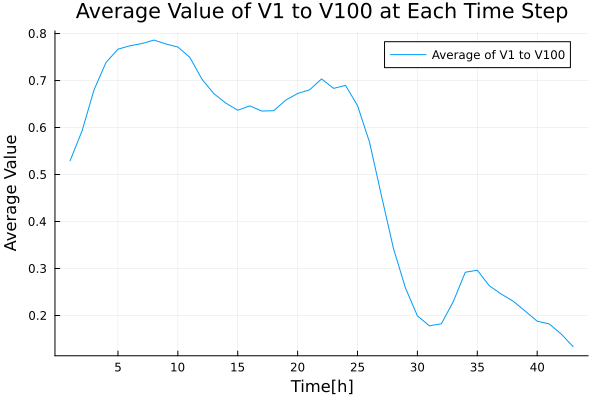

In [49]:
mean_values = mean.(eachrow(df[:, 2:end]))

# Plotting the mean values against the time steps 
plot(df[:, 1], mean_values, label="Average of V1 to V100", xlabel="Time[h]", ylabel="Average Value", title="Average Value of V1 to V100 at Each Time Step")



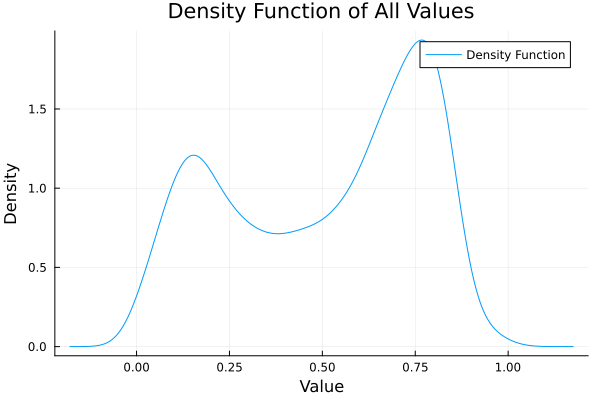

In [50]:
# Assuming your DataFrame is named df
# Flatten the DataFrame to a 1D array and convert to Float64
values = Float64.(collect(Iterators.flatten(eachcol(df[:, 2:end]))))  # Exclude the first column (Row) and convert to Float64

# Compute the kernel density estimate (KDE)
kde_result = kde(values)

# Create a plot of the density estimate as a line
plot(kde_result.x, kde_result.density, label="Density Function", legend=:topright)
xlabel!("Value")
ylabel!("Density")
title!("Density Function of All Values")


In [51]:
"""
# Initialize a random number generator
rng = MersenneTwister()
# Create an empty matrix to store scenarios
num_scenarios = 10000
num_variables = 24
scenarios_matrix = zeros(Float64, num_scenarios, num_variables)

# Iterate through each variable (hour) in your DataFrame
for col in 2:(num_variables + 1)  # Correct the range of columns
    # Extract the values for the current variable (hour)
    variable_values = df[!, col]
    
    # Filter out invalid or non-positive values
    valid_values = filter(x -> x > 0 && isfinite(x), variable_values)

    # Fit a Weibull distribution to the valid values
    fitted_dist = fit_mle(Weibull, valid_values)

    # Generate scenarios for the current variable
    scenarios = rand(rng, fitted_dist, num_scenarios)

    # Store the scenarios in the matrix
    scenarios_matrix[:, col - 1] = scenarios
end

# Convert the scenarios matrix to a DataFrame with auto-generated column names
scenarios_df = DataFrame(scenarios_matrix, :auto)

# 'scenarios_df' now contains 10,000 scenarios, each with 24 variables (hours)


LoadError: syntax: incomplete: invalid string syntax

In [52]:
# Calculate the average of V1 to V100 for each row, handling missing data
# Create an array to store the average values
average_column = Float64[]

# Iterate over each row and compute the mean of the columns V1 to V100
for row in eachrow(df)
    # Use skipmissing to exclude missing values from the mean calculation
    push!(average_column, mean(skipmissing(row[2:101])))
end

# Use the first 24 rows for fitting the Weibull distribution
average_first_24 = average_column[1:24]

# Fit the Weibull distribution to the average of the first 24 rows
fitted_dist = fit_mle(Weibull, average_first_24)

# Set the number of scenarios you want to generate for each time step
num_scenarios = 10000

# Initialize a random number generator
rng = MersenneTwister()

# Generate scenarios for each of the 24 time steps
scenarios_matrix = [rand(rng, fitted_dist, num_scenarios) for _ in 1:24]

# Convert the scenarios matrix to a DataFrame
# First, convert scenarios_matrix (which is a vector of vectors) to a matrix
scenarios_matrix = hcat(scenarios_matrix...)

# Now, you can safely convert it to a DataFrame
scenarios_df = DataFrame(scenarios_matrix, :auto)

Row,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.771446,0.756924,0.785407,0.747268,0.725191,0.717588,0.637129,0.690513,0.716097,0.56342,0.779697,0.602997,0.588456,0.711419,0.715287,0.675342,0.759194,0.757366,0.707642,0.589847,0.672437,0.67655,0.654372,0.6944
2,0.722098,0.720069,0.728263,0.676528,0.700792,0.628019,0.737501,0.631904,0.478595,0.461591,0.583473,0.740138,0.713692,0.594623,0.715718,0.732828,0.647671,0.781838,0.746962,0.53906,0.643565,0.71861,0.600317,0.534435
3,0.515674,0.767356,0.699923,0.761058,0.748598,0.79685,0.697332,0.610266,0.607244,0.754853,0.64501,0.682221,0.546734,0.615719,0.661264,0.742307,0.784186,0.769354,0.605215,0.680146,0.768178,0.689582,0.626416,0.667086
4,0.652903,0.78771,0.682437,0.713048,0.721935,0.743609,0.771449,0.633002,0.599609,0.645299,0.677186,0.672011,0.643371,0.756051,0.633249,0.638683,0.650183,0.720236,0.724147,0.758673,0.664062,0.722084,0.735786,0.655262
5,0.684886,0.564909,0.636708,0.665247,0.692802,0.662209,0.741507,0.745864,0.743202,0.734003,0.731601,0.724689,0.678815,0.738666,0.455561,0.711943,0.699155,0.734026,0.575688,0.722784,0.661058,0.783445,0.650823,0.761048
6,0.680131,0.791144,0.730975,0.772268,0.624426,0.697142,0.603851,0.651509,0.642075,0.70468,0.693897,0.710165,0.73459,0.763898,0.622254,0.586636,0.759936,0.709208,0.783803,0.707629,0.728703,0.693492,0.676858,0.736826
7,0.738979,0.700552,0.655773,0.630441,0.690035,0.748845,0.807393,0.749192,0.651221,0.638648,0.761551,0.670501,0.753749,0.646056,0.702581,0.774998,0.709657,0.749003,0.762255,0.537511,0.672209,0.659508,0.727822,0.644971
8,0.769435,0.687589,0.639428,0.719307,0.736593,0.757036,0.555872,0.643028,0.720439,0.682639,0.734564,0.63786,0.691526,0.514485,0.722351,0.701593,0.823441,0.710663,0.708756,0.601296,0.670639,0.573771,0.738023,0.603235
9,0.650902,0.693575,0.681931,0.682406,0.659823,0.707073,0.787281,0.642113,0.701599,0.689924,0.672175,0.507104,0.764055,0.731221,0.514623,0.735485,0.782051,0.813912,0.57722,0.702221,0.762324,0.763863,0.681628,0.602063


## Clustering

In [53]:
# Transpose matrix to generate centers
km = kmeans(scenarios_matrix', 101)


KmeansResult{Matrix{Float64}, Float64, Int64}([0.7289165845075318 0.6889981136588398 … 0.6713014818056577 0.700778593029129; 0.7163886630208345 0.678975817709139 … 0.6659970988906293 0.6888875726402585; … ; 0.7446675181100093 0.6972363426930364 … 0.6737395870113179 0.7111427384715423; 0.6371373137856091 0.7079722048588322 … 0.7084616748541104 0.7042632030595193], [68, 98, 30, 98, 12, 78, 11, 69, 12, 56  …  42, 45, 36, 71, 48, 10, 45, 11, 36, 36], [0.060723595564002864, 0.1454558341135943, 0.08872845235640625, 0.05312932765127698, 0.06900932850540897, 0.06041949333685892, 0.06173136682264868, 0.08855924963266304, 0.09970214173672787, 0.057149067331891956  …  0.09077251521050655, 0.07321616195740432, 0.06732891683897435, 0.09535194523565593, 0.06400025771680262, 0.06927917845517229, 0.059937158694513215, 0.10366207393431282, 0.05317911296912925, 0.07252325089054068], [121, 98, 85, 85, 128, 128, 70, 113, 122, 120  …  90, 77, 108, 114, 126, 90, 75, 111, 90, 131], [121, 98, 85, 85, 128, 128

In [54]:
km.centers

24×101 Matrix{Float64}:
 0.728917  0.688998  0.661349  0.59221   …  0.693492  0.671301  0.700779
 0.716389  0.678976  0.600587  0.712954     0.725288  0.665997  0.688888
 0.692143  0.734454  0.688057  0.718545     0.708901  0.719412  0.708207
 0.700333  0.712074  0.720502  0.726705     0.53079   0.709526  0.697641
 0.649027  0.729883  0.707487  0.643663     0.692298  0.701612  0.699283
 0.706271  0.717959  0.616971  0.736521  …  0.72626   0.70132   0.682601
 0.701077  0.660455  0.723248  0.726044     0.719121  0.694577  0.705609
 0.715297  0.721742  0.709297  0.652466     0.707787  0.707513  0.692026
 0.705562  0.712425  0.689285  0.700788     0.692769  0.715346  0.715177
 0.704184  0.703959  0.701039  0.724337     0.699145  0.708093  0.703089
 0.705666  0.69948   0.727923  0.657676  …  0.720264  0.668667  0.711709
 0.720636  0.611103  0.649169  0.700202     0.685131  0.707567  0.688653
 0.736895  0.66958   0.675478  0.713024     0.71593   0.703327  0.720605
 0.720093  0.543979  0.6523

Problems: Monte Carlo approach correctly implemented? Data just from one day (i.e. first 24 hours) with high wind speed. Interdependencies between wind speeds at different hours?

## Testing

Is it a good idea to exclude the first ~ 20 rows for a more Weibull-like density function? Moreover, should we use all 15 zones?

In [55]:
data_frames = Vector{DataFrame}()

# Define the number of zones you have
num_zones = 15
start_row = 18
end_row = 41

# Create an empty vector to store the DataFrames
data_frames = Vector{DataFrame}()

for zone in 1:num_zones
    # Construct the file path
    file_path = "data/scen_zone$zone.out"
    
    # Read the DataFrame from the CSV file
    df = CSV.read(file_path, DataFrame)
    
    # Drop missing values if needed
    df = dropmissing(df, disallowmissing=true)

    # Drop first 20 rows
    df = df[start_row:end_row, :]

    # Append the DataFrame to the vector
    push!(data_frames, df)
end


┌ Warning: thread = 1 warning: only found 1 / 101 columns around data row: 44. Filling remaining columns with `missing`
└ @ CSV C:\Users\user\.julia\packages\CSV\aoJqo\src\file.jl:586
┌ Warning: thread = 1 warning: only found 1 / 101 columns around data row: 44. Filling remaining columns with `missing`
└ @ CSV C:\Users\user\.julia\packages\CSV\aoJqo\src\file.jl:586
┌ Warning: thread = 1 warning: only found 1 / 101 columns around data row: 44. Filling remaining columns with `missing`
└ @ CSV C:\Users\user\.julia\packages\CSV\aoJqo\src\file.jl:586
┌ Warning: thread = 1 warning: only found 1 / 101 columns around data row: 44. Filling remaining columns with `missing`
└ @ CSV C:\Users\user\.julia\packages\CSV\aoJqo\src\file.jl:586
┌ Warning: thread = 1 warning: only found 1 / 101 columns around data row: 44. Filling remaining columns with `missing`
└ @ CSV C:\Users\user\.julia\packages\CSV\aoJqo\src\file.jl:586
┌ Warning: thread = 1 warning: only found 1 / 101 columns around data row: 44. F

In [56]:
df_merged = vcat(data_frames...)


Row,Column1,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,⋯
,String3,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,⋯
1,18,0.656485,0.726078,0.673278,0.737031,0.714712,0.45014,0.590941,0.729499,0.668899,0.731009,0.856224,0.670463,0.48983,0.668979,0.243997,0.559004,0.681682,0.603286,0.632082,0.712604,0.655751,0.29092,0.606813,0.78226,0.444627,0.741667,0.775898,0.633236,0.696621,0.758853,0.789581,0.696637,0.555358,0.787078,0.840576,0.601302,0.472335,0.737992,0.335939,0.182953,0.577607,0.77288,0.658792,0.582454,0.579806,0.618637,0.739022,0.701517,0.738587,0.548896,0.727058,0.637706,0.765299,0.784702,0.675476,0.519373,0.713263,0.631977,0.768388,0.548505,0.762292,0.162297,0.673604,0.14321,0.775077,0.646969,0.764942,0.687967,0.682431,0.542242,0.804822,0.775891,0.559118,0.569131,0.73767,0.547271,0.714018,0.70341,0.729543,0.643065,0.486971,0.780115,0.655337,0.72567,0.627273,0.534672,0.582716,0.693634,0.767881,0.817084,0.457803,0.441679,0.849156,0.59203,0.860539,0.140543,0.703046,0.54839,0.736167,⋯
2,19,0.734256,0.784294,0.490773,0.783363,0.663607,0.553688,0.45804,0.684766,0.717065,0.772832,0.81505,0.731856,0.618664,0.688797,0.169851,0.70009,0.647518,0.710622,0.738068,0.703564,0.752535,0.308157,0.634717,0.779259,0.378256,0.754681,0.766964,0.529818,0.661071,0.758346,0.776002,0.739733,0.545363,0.799088,0.957936,0.507454,0.578196,0.637949,0.445065,0.613493,0.647318,0.663423,0.664612,0.585201,0.544748,0.60893,0.738877,0.59768,0.7687,0.638712,0.801557,0.636344,0.733465,0.733611,0.645105,0.664851,0.729049,0.599318,0.745076,0.597439,0.810098,0.455992,0.53572,0.186706,0.753766,0.568661,0.764841,0.687377,0.679361,0.606586,0.813451,0.79196,0.608805,0.559676,0.763956,0.617606,0.724434,0.729675,0.646535,0.673401,0.316016,0.715099,0.752463,0.753484,0.619335,0.553203,0.579828,0.726241,0.744245,0.806618,0.60899,0.604749,0.800172,0.614373,0.939628,0.491759,0.726359,0.688256,0.735588,⋯
3,20,0.724074,0.816551,0.60419,0.768002,0.741313,0.655757,0.508252,0.733457,0.664313,0.765307,0.890773,0.659269,0.387693,0.758633,0.198749,0.692749,0.672213,0.760273,0.763532,0.727568,0.828045,0.312842,0.608065,0.765726,0.127259,0.748953,0.775381,0.624381,0.716303,0.719373,0.795826,0.58263,0.622171,0.801106,0.957539,0.383368,0.68377,0.635678,0.569401,0.678628,0.741402,0.60845,0.752071,0.762302,0.588054,0.523694,0.767926,0.488832,0.817226,0.461408,0.793619,0.760018,0.767304,0.714851,0.681434,0.752604,0.648043,0.736244,0.723152,0.63718,0.763517,0.384379,0.195302,0.566001,0.639509,0.728634,0.748714,0.722969,0.688734,0.562421,0.826517,0.818748,0.619881,0.76075,0.765054,0.664882,0.720719,0.794104,0.717407,0.655276,0.639653,0.771324,0.783756,0.779934,0.586318,0.156451,0.663586,0.697422,0.685536,0.831968,0.638602,0.604729,0.771771,0.739101,0.985896,0.528373,0.640916,0.687732,0.76871,⋯
4,21,0.736488,0.818464,0.693157,0.732627,0.816839,0.679763,0.162479,0.712647,0.669418,0.796547,0.927107,0.79704,0.327613,0.826175,

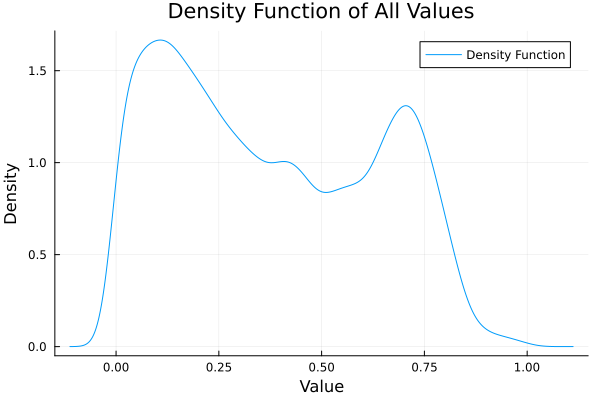

In [57]:
# Assuming your DataFrame is named df
# Flatten the DataFrame to a 1D array and convert to Float64
values = Float64.(collect(Iterators.flatten(eachcol(df_merged[:, 2:end]))))  # Exclude the first column (Row) and convert to Float64

# Compute the kernel density estimate (KDE)
kde_result = kde(values)

# Create a plot of the density estimate as a line
plot(kde_result.x, kde_result.density, label="Density Function", legend=:topright)
xlabel!("Value")
ylabel!("Density")
title!("Density Function of All Values")
